In [132]:
import pandas as pd
import networkx as nx
from networkx.algorithms.centrality import edge_betweenness_centrality
import matplotlib.pyplot as plt
from networkx.algorithms.community.quality import modularity


In [133]:
file_path = "US-Airline-Flight-Routes-and-Fares-1993-2024.csv"

df = pd.read_csv(file_path)

/var/folders/9q/gbjddknj7mq1767dkmfmh8600000gn/T/ipykernel_93915/4121340720.py:3: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [134]:

df_filtered = df[(df['Year'] == 2023) | (df['Year'] == 2024)]
df_filtered = df_filtered[['airport_1', 'airport_2', 'nsmiles']]


In [135]:
# Step 4: Create a directed graph
G = nx.Graph()

# Step 5: Add edges with weights (distance in miles)
for _, row in df_filtered.iterrows():
    airport_1 = row['airport_1']
    airport_2 = row['airport_2']
    distance = row['nsmiles']
    
    # Check for missing or invalid data
    if pd.notna(airport_1) and pd.notna(airport_2) and pd.notna(distance):
        G.add_edge(airport_1, airport_2, weight=distance)

print ('Edge List')
for line in nx.generate_edgelist(G, data=False):
    print(line)

Edge List
MDW IND
MDW ABQ
MDW ATL
MDW AUS
MDW BHM
MDW BOS
MDW MHT
MDW PVD
MDW BUF
MDW DAL
MDW DFW
MDW PIT
MDW DEN
MDW TUS
MDW PHX
MDW BDL
MDW SEA
MDW ELP
MDW CLE
MDW BNA
MDW BWI
MDW DCA
MDW IAD
MDW CMH
MDW STL
MDW JAX
MDW DTW
MDW HOU
MDW IAH
MDW MCO
MDW MSP
MDW EWR
MDW HPN
MDW ISP
MDW JFK
MDW LGA
MDW RSW
MDW GSP
MDW LAS
MDW OAK
MDW SFO
MDW SJC
MDW FLL
MDW MIA
MDW BUR
MDW LAX
MDW LGB
MDW ONT
MDW SNA
MDW SDF
MDW CVG
MDW SMF
MDW TPA
MDW MCI
MDW SAT
MDW MEM
MDW OMA
MDW MSY
MDW SAN
MDW ORF
MDW PNS
MDW OKC
MDW PBI
MDW PDX
MDW PHL
MDW PSP
MDW RDU
MDW RIC
MDW SLC
MDW SAV
MDW SRQ
MDW TYS
MDW CHS
MDW CLT
MDW ALB
MDW AVL
MDW BOI
MDW COS
MDW MYR
MDW GSO
MDW LIT
MDW PWM
MDW RNO
MDW ROC
MDW TUL
MDW SYR
MDW BTV
MDW BZN
MDW DSM
MDW FAT
MDW XNA
MDW MDT
MDW EYW
IND DAL
IND DFW
IND BOS
IND MHT
IND PVD
IND HOU
IND IAH
IND PHX
IND BWI
IND DCA
IND IAD
IND EWR
IND HPN
IND ISP
IND JFK
IND LGA
IND OAK
IND SFO
IND SJC
IND FLL
IND MIA
IND BUR
IND LAX
IND LGB
IND ONT
IND SNA
IND PIE
IND TPA
IND ORD
AUS PHX
AUS DA

MDW 0.633
IND 0.204
AUS 0.190
PHX 0.592
ABE 0.014
PIE 0.163
TPA 0.517
ABQ 0.177
DAL 0.599
DFW 0.619
BWI 0.599
DCA 0.605
IAD 0.592
ORD 0.646
HOU 0.551
IAH 0.537
EWR 0.646
HPN 0.646
ISP 0.510
JFK 0.653
LGA 0.660
OAK 0.483
SFO 0.483
SJC 0.483
BUR 0.592
LAX 0.599
LGB 0.544
ONT 0.599
SNA 0.605
ACY 0.020
FLL 0.544
MIA 0.531
COS 0.102
PIT 0.204
DEN 0.245
TUS 0.150
BDL 0.129
SEA 0.231
ELP 0.156
BNA 0.218
STL 0.211
JAX 0.204
DTW 0.197
DSM 0.170
MCO 0.231
ECP 0.014
VPS 0.034
MSP 0.231
RSW 0.197
GSP 0.082
GRR 0.177
HRL 0.027
LAS 0.252
LIT 0.082
LBB 0.027
SDF 0.184
MAF 0.027
SMF 0.170
MCI 0.204
SAT 0.197
MEM 0.184
OMA 0.190
MKE 0.184
MSY 0.204
SAN 0.204
ORF 0.204
PHF 0.163
PNS 0.095
PBI 0.156
PDX 0.204
PHL 0.163
PSP 0.082
RDU 0.197
RIC 0.184
RNO 0.156
SLC 0.197
TUL 0.122
SAV 0.163
HSV 0.020
ALB 0.095
AMA 0.014
SWF 0.116
ASE 0.054
ATL 0.238
CAK 0.265
CLE 0.299
BOS 0.490
MHT 0.483
PVD 0.476
CMH 0.272
ATW 0.014
AZA 0.163
AVL 0.088
FSD 0.014
GEG 0.068
PVU 0.027
BHM 0.136
BIL 0.014
BIS 0.014
SRQ 0.116


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


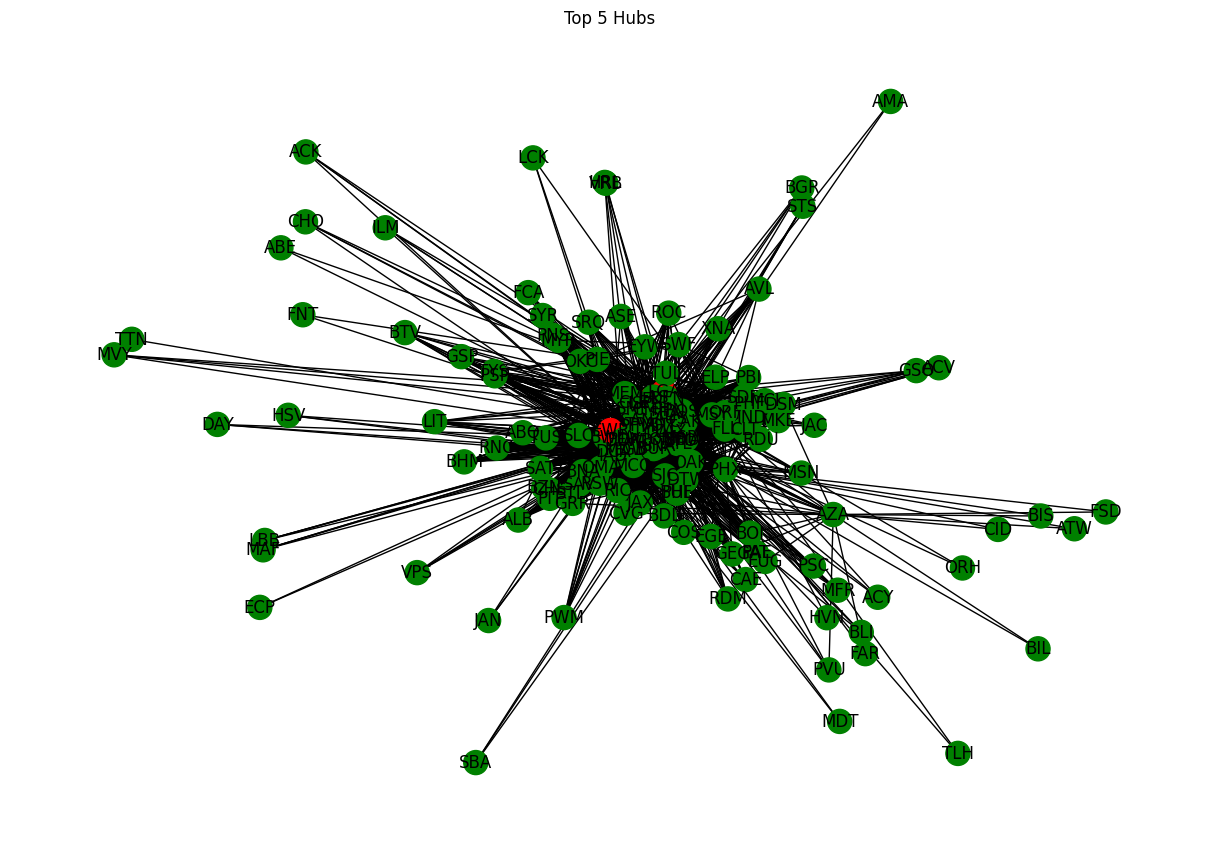

In [136]:
d = nx.degree_centrality(G)
for v in G.nodes():
    print(f"{v:2} {d[v]:.3f}")
sort_list = sorted(d.items(), key=lambda x: x[1], reverse=True)

top_hubs = [sort_list[0][0], sort_list[1][0], sort_list[2][0], sort_list[3][0], sort_list[4][0]]  # Top 5 hubs
print(f"Top hubs: {top_hubs}")

color_map = []
for node in G:
    if (node == sort_list[0][0]) or (node== sort_list[1][0]) or (node== sort_list[2][0]) or (node== sort_list[3][0]) or (node== sort_list[4][0]):
        color_map.append('red')
    else: 
        color_map.append('green')      
#nx.draw(G, node_color=color_map, with_labels=True)
plt.figure(figsize=(12, 8))
nx.draw(G, node_color=color_map, with_labels=True, cmap=plt.cm.tab10)
plt.title("Top 5 Hubs")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


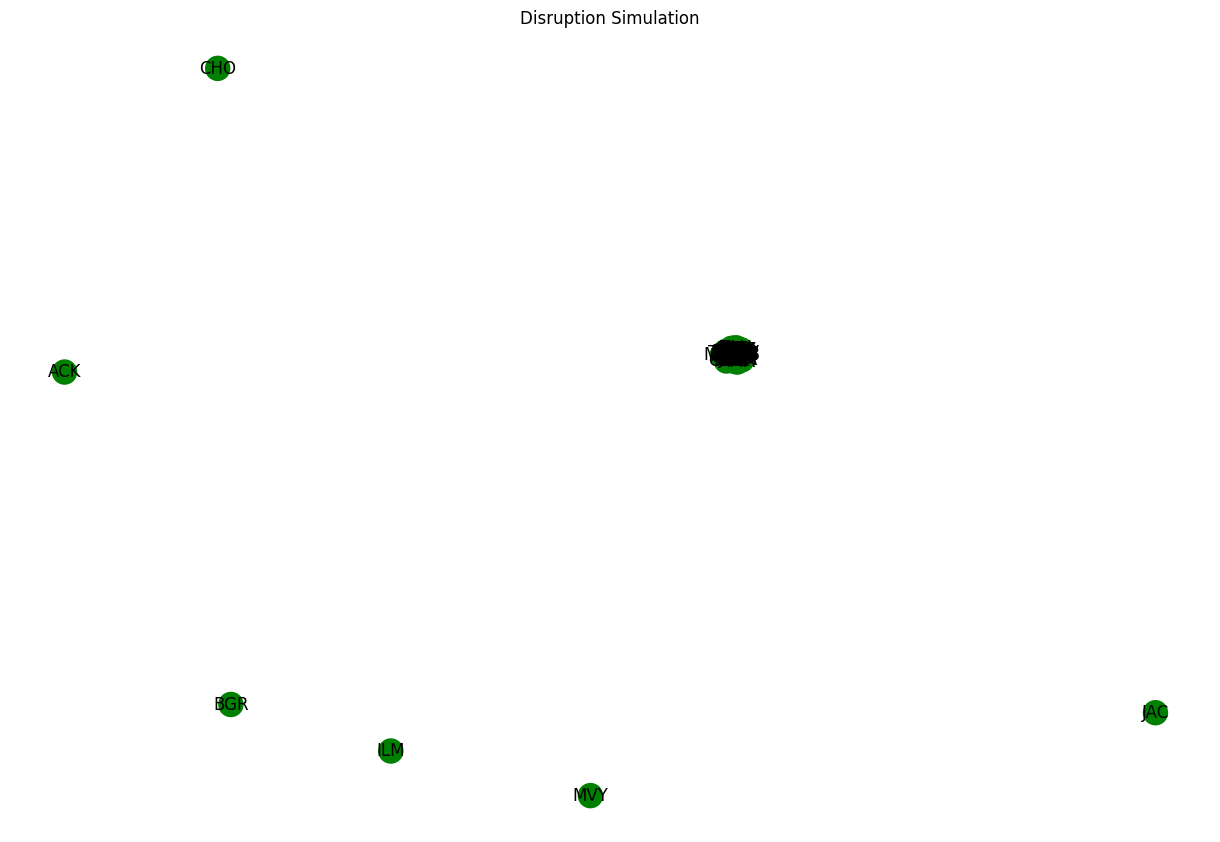

In [149]:
# Step 3: Create a copy of the graph and remove the top hubs
G_disrupted = G.copy()

G_disrupted.remove_nodes_from(top_hubs)

# Step 4: Visualize the final disrupted network
color_map = []
for node in G_disrupted:
    if node in top_hubs:
        color_map.append('red')  # Mark removed hubs in red
    else:
        color_map.append('green')  # Mark remaining nodes in green

#nx.draw(G_disrupted, node_color=color_map, with_labels=True)
plt.figure(figsize=(12, 8))
nx.draw(G_disrupted, node_color=color_map, with_labels=True, cmap=plt.cm.tab10)
plt.title("Disruption Simulation")
plt.show()

In [138]:
G_disrupted_calc = G.copy()

for hub in top_hubs:
    # Remove the hub
    G_disrupted_calc.remove_node(hub)
    print(f"\nRemoved hub: {hub}")
    
    # Analyze connectivity
    connected_components = list(nx.connected_components(G_disrupted_calc))
    print(f"Number of connected components after removing {hub}: {len(connected_components)}")

    # Count the number of disconnected nodes (single-node components)
    disconnected_nodes = [comp for comp in connected_components if len(comp) == 1]
    print(f"Number of disconnected nodes after removing {hub}: {len(disconnected_nodes)}")
    
    # Calculate shortest paths between all pairs
    shortest_paths = {}
    for source in G_disrupted_calc.nodes():
        for target in G_disrupted_calc.nodes():
            if source != target:
                try:
                    # Compute shortest path length
                    path_length = nx.shortest_path_length(G_disrupted_calc, source=source, target=target, weight='weight')
                    shortest_paths[(source, target)] = path_length
                except nx.NetworkXNoPath:
                    shortest_paths[(source, target)] = None  # No path exists

    # Calculate average shortest path length (only for connected pairs)
    connected_paths = [length for length in shortest_paths.values() if length is not None]
    if connected_paths:
        avg_shortest_path = sum(connected_paths) / len(connected_paths)
        print(f"Average shortest path length after removing {hub}: {avg_shortest_path:.2f}")
    else:
        print(f"All nodes are disconnected after removing {hub}.")

print(connected_components)


Removed hub: LGA
Number of connected components after removing LGA: 1
Number of disconnected nodes after removing LGA: 0
Average shortest path length after removing LGA: 1787.30

Removed hub: JFK
Number of connected components after removing JFK: 1
Number of disconnected nodes after removing JFK: 0
Average shortest path length after removing JFK: 1791.80

Removed hub: ORD
Number of connected components after removing ORD: 1
Number of disconnected nodes after removing ORD: 0
Average shortest path length after removing ORD: 1800.65

Removed hub: EWR
Number of connected components after removing EWR: 1
Number of disconnected nodes after removing EWR: 0
Average shortest path length after removing EWR: 1806.54

Removed hub: HPN
Number of connected components after removing HPN: 7
Number of disconnected nodes after removing HPN: 6
Average shortest path length after removing HPN: 1799.00
[{'HSV', 'TUS', 'IAH', 'XNA', 'PDX', 'ECP', 'PIT', 'TYS', 'CHS', 'VRB', 'LAX', 'MAF', 'SFO', 'TUL', 'RDM'

In [139]:
def edge_to_remove(g):
    betwen_cen = nx.edge_betweenness_centrality(g)
    list_of_tuples = list(betwen_cen.items())
    
    # Sort edges by betweenness centrality (highest first)
    list_of_tuples.sort(key=lambda x: x[1], reverse=True)
    
    # Return the edge with the highest betweenness
    return list_of_tuples[0][0]

def girvan_newman(g, num_communities):
    g_copy = g.copy()
    components_functions = nx.connected_components if not g_copy.is_directed() else nx.weakly_connected_components

    # Initial number of components
    components = list(components_functions(g_copy))
    while len(components) < num_communities:
        # Remove the edge with the highest betweenness centrality
        u, v = edge_to_remove(g_copy)
        g_copy.remove_edge(u, v)
        
        # Update components
        components = list(components_functions(g_copy))
        print(f"Number of connected components: {len(components)}")
    
    return components

Number of connected components: 2
Number of connected components: 2
Number of connected components: 3
Community 1: {'ILM', 'HSV', 'TUS', 'IAH', 'XNA', 'PDX', 'ECP', 'PIT', 'TYS', 'CHS', 'VRB', 'LAX', 'MAF', 'SFO', 'TUL', 'RDM', 'DFW', 'MFR', 'JAN', 'EGE', 'LCK', 'ORD', 'ATW', 'IAD', 'PIE', 'CHO', 'ALB', 'MSN', 'OAK', 'GSO', 'MHT', 'HRL', 'BIL', 'AZA', 'CLT', 'RSW', 'PSC', 'ASE', 'CMH', 'BUR', 'LAS', 'BOI', 'MIA', 'PNS', 'LBB', 'MSY', 'PBI', 'SAT', 'MDW', 'LIT', 'DTW', 'EUG', 'MVY', 'MKE', 'DAY', 'SJC', 'DSM', 'RIC', 'BDL', 'FNT', 'OKC', 'RNO', 'PHX', 'ACV', 'SEA', 'AVL', 'BUF', 'SMF', 'SYR', 'OMA', 'IND', 'SWF', 'GEG', 'HVN', 'STL', 'EYW', 'BTV', 'PSP', 'ISP', 'MYR', 'SAV', 'HOU', 'ROC', 'ORH', 'FLL', 'COS', 'PHF', 'CID', 'CVG', 'SDF', 'LGB', 'ORF', 'BOS', 'PVD', 'AUS', 'TLH', 'GSP', 'PWM', 'BLI', 'CLE', 'SNA', 'JAC', 'CAE', 'EWR', 'AMA', 'BNA', 'HPN', 'JFK', 'STS', 'ACK', 'MCI', 'MCO', 'FAT', 'FCA', 'SBA', 'MSP', 'BZN', 'PAE', 'CAK', 'FAR', 'BWI', 'DAL', 'RDU', 'FSD', 'MDT', 'DCA', 'G

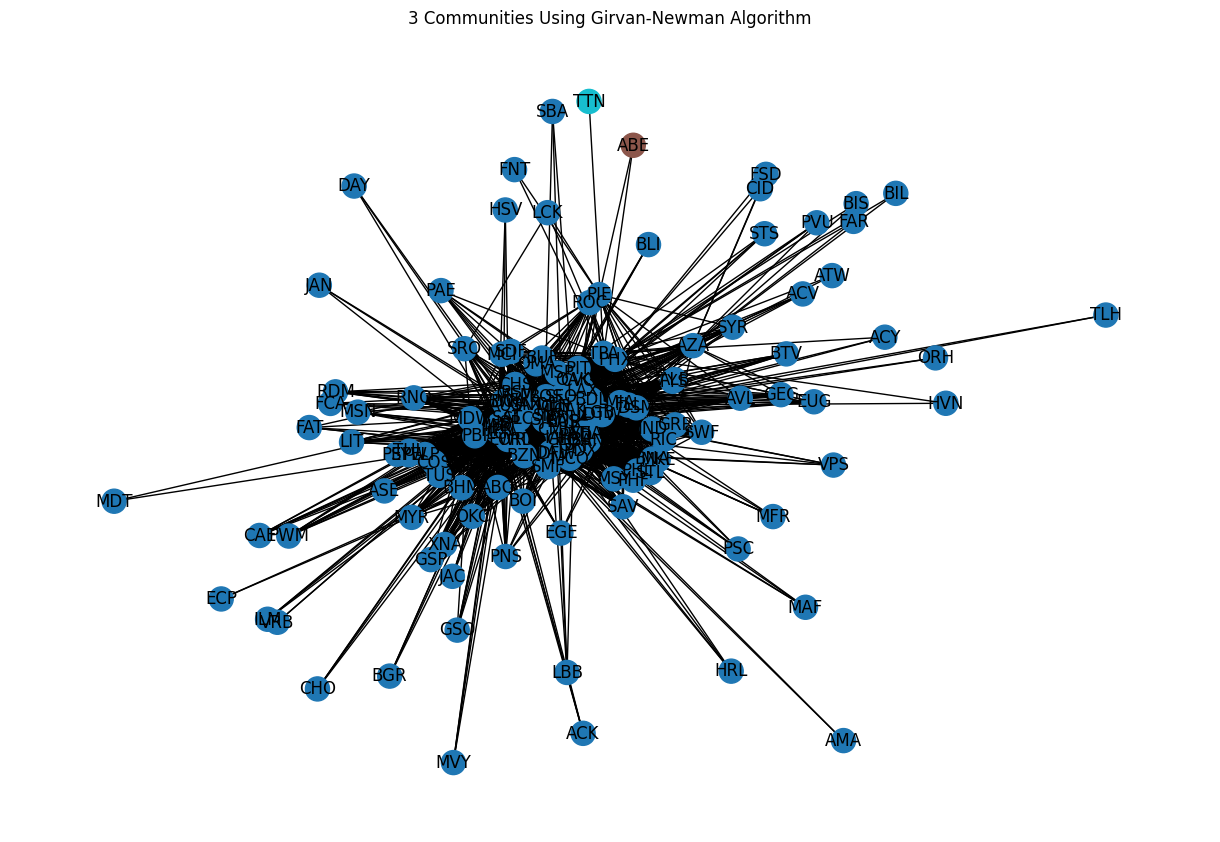

In [140]:
num_communities = 3
G_copy = G.copy().to_undirected()
communities = girvan_newman(G_copy, num_communities)

for i, community in enumerate(communities, start=1):
    print(f"Community {i}: {community}")

color_map = []
for node in G:
    for i, community in enumerate(communities):
        if node in community:
            color_map.append(i)

plt.figure(figsize=(12, 8))
nx.draw(G, node_color=color_map, with_labels=True, cmap=plt.cm.tab10)
plt.title("3 Communities Using Girvan-Newman Algorithm")
plt.show()

Number of connected components: 2
Number of connected components: 2
Number of connected components: 3
Number of connected components: 3
Number of connected components: 4
Community 1: {'ILM', 'HSV', 'TUS', 'IAH', 'XNA', 'PDX', 'ECP', 'PIT', 'TYS', 'CHS', 'VRB', 'LAX', 'MAF', 'SFO', 'TUL', 'RDM', 'DFW', 'MFR', 'JAN', 'EGE', 'LCK', 'ORD', 'ATW', 'IAD', 'PIE', 'CHO', 'ALB', 'MSN', 'OAK', 'GSO', 'MHT', 'HRL', 'BIL', 'AZA', 'CLT', 'RSW', 'PSC', 'ASE', 'CMH', 'BUR', 'LAS', 'BOI', 'MIA', 'PNS', 'LBB', 'MSY', 'PBI', 'SAT', 'MDW', 'LIT', 'DTW', 'EUG', 'MVY', 'MKE', 'DAY', 'SJC', 'DSM', 'RIC', 'BDL', 'OKC', 'RNO', 'PHX', 'ACV', 'SEA', 'AVL', 'BUF', 'SMF', 'SYR', 'OMA', 'IND', 'SWF', 'GEG', 'HVN', 'STL', 'EYW', 'BTV', 'PSP', 'ISP', 'MYR', 'SAV', 'HOU', 'ROC', 'ORH', 'FLL', 'COS', 'PHF', 'CID', 'CVG', 'SDF', 'LGB', 'ORF', 'BOS', 'PVD', 'AUS', 'TLH', 'GSP', 'PWM', 'BLI', 'CLE', 'SNA', 'JAC', 'CAE', 'EWR', 'AMA', 'BNA', 'HPN', 'JFK', 'STS', 'ACK', 'MCI', 'MCO', 'FAT', 'FCA', 'SBA', 'MSP', 'BZN', 'PAE

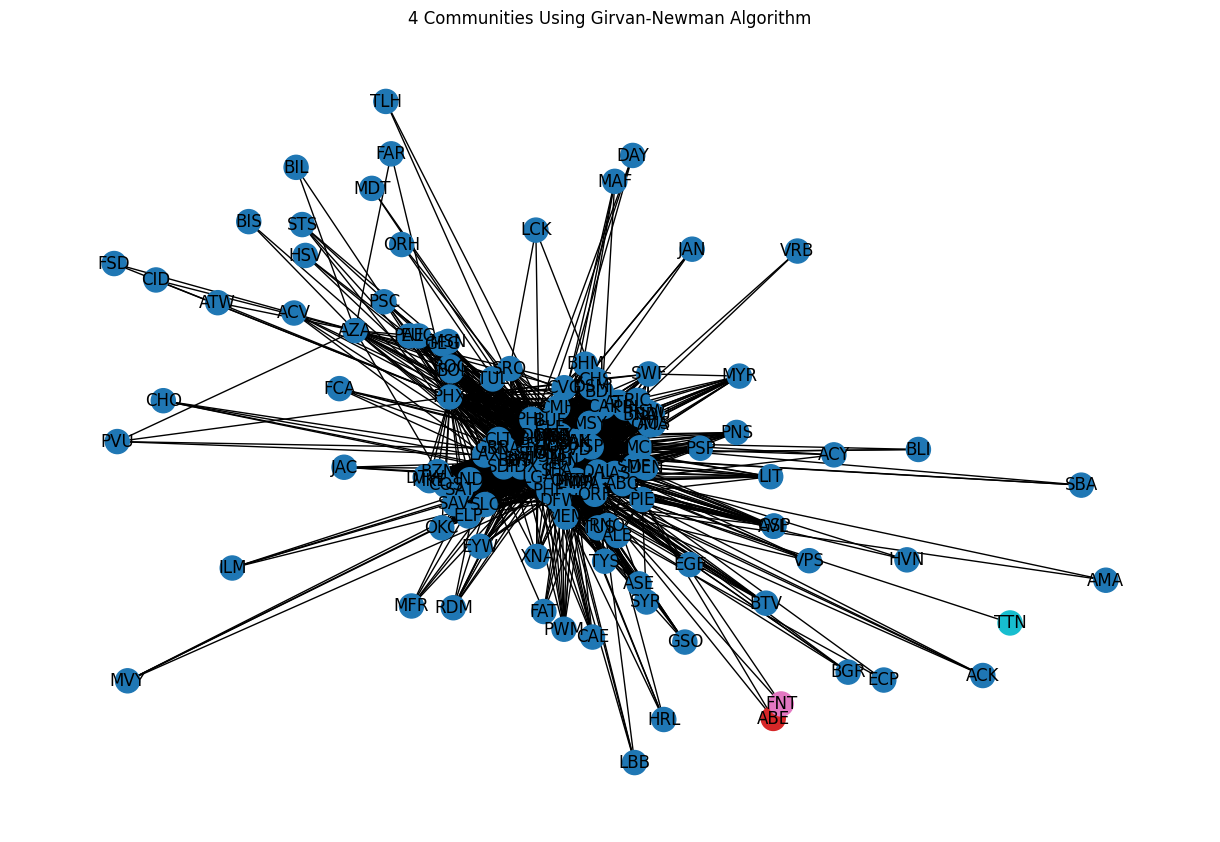

In [141]:
num_communities = 4
communities = girvan_newman(G, num_communities)

for i, community in enumerate(communities, start=1):
    print(f"Community {i}: {community}")

color_map = []
for node in G:
    for i, community in enumerate(communities):
        if node in community:
            color_map.append(i)

plt.figure(figsize=(12, 8))
nx.draw(G, node_color=color_map, with_labels=True, cmap=plt.cm.tab10)
plt.title("4 Communities Using Girvan-Newman Algorithm")
plt.show()

Number of connected components: 2
Number of connected components: 2
Number of connected components: 3
Number of connected components: 3
Number of connected components: 4
Number of connected components: 4
Number of connected components: 5
Community 1: {'ILM', 'HSV', 'TUS', 'IAH', 'XNA', 'PDX', 'ECP', 'PIT', 'TYS', 'CHS', 'VRB', 'LAX', 'MAF', 'SFO', 'TUL', 'RDM', 'DFW', 'MFR', 'JAN', 'EGE', 'LCK', 'ORD', 'IAD', 'PIE', 'CHO', 'ALB', 'MSN', 'OAK', 'GSO', 'MHT', 'HRL', 'BIL', 'AZA', 'CLT', 'RSW', 'PSC', 'ASE', 'CMH', 'BUR', 'LAS', 'BOI', 'MIA', 'PNS', 'LBB', 'MSY', 'PBI', 'SAT', 'MDW', 'LIT', 'DTW', 'EUG', 'MVY', 'MKE', 'DAY', 'SJC', 'DSM', 'RIC', 'BDL', 'OKC', 'RNO', 'PHX', 'ACV', 'SEA', 'AVL', 'BUF', 'SMF', 'SYR', 'OMA', 'IND', 'SWF', 'GEG', 'HVN', 'STL', 'EYW', 'BTV', 'PSP', 'ISP', 'MYR', 'SAV', 'HOU', 'ROC', 'ORH', 'FLL', 'COS', 'PHF', 'CID', 'CVG', 'SDF', 'LGB', 'ORF', 'BOS', 'PVD', 'AUS', 'TLH', 'GSP', 'PWM', 'BLI', 'CLE', 'SNA', 'JAC', 'CAE', 'EWR', 'AMA', 'BNA', 'HPN', 'JFK', 'STS',

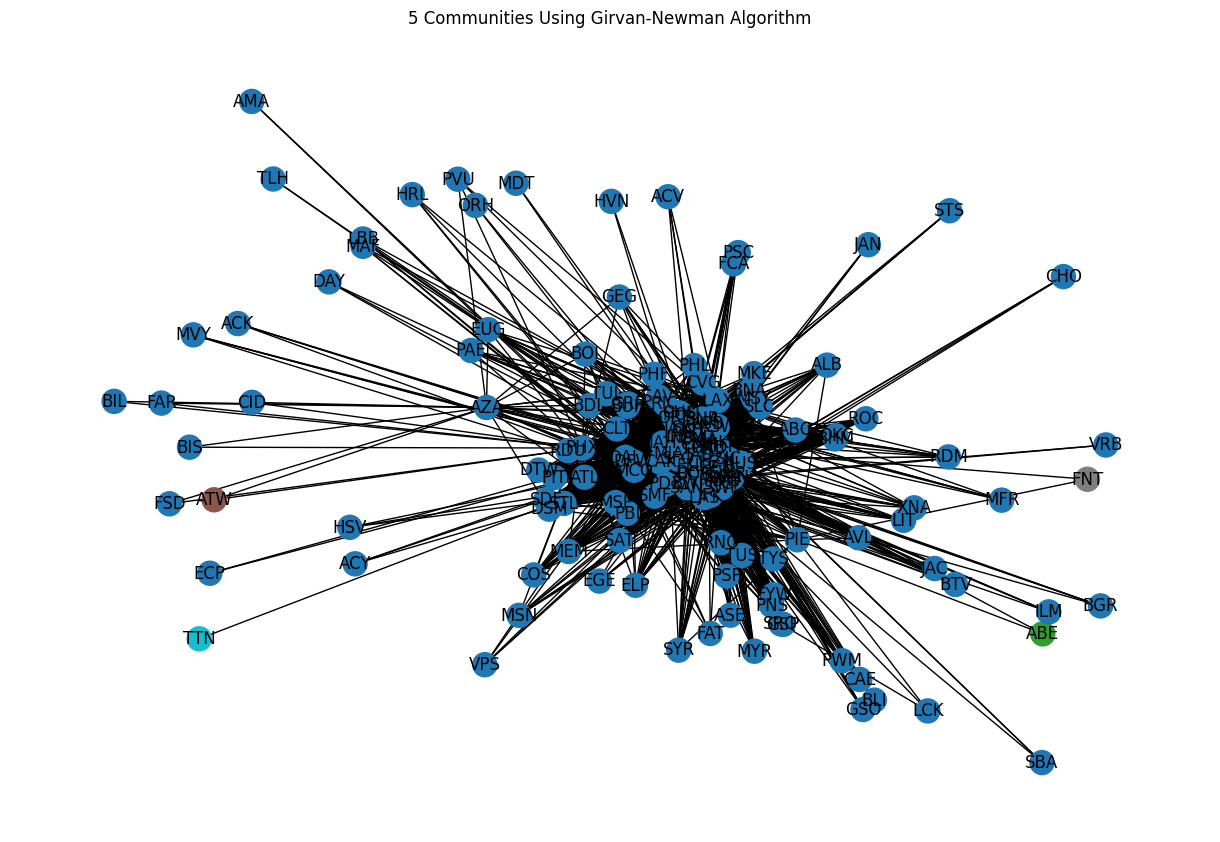

In [142]:
num_communities = 5
communities = girvan_newman(G, num_communities)

for i, community in enumerate(communities, start=1):
    print(f"Community {i}: {community}")

color_map = []
for node in G:
    for i, community in enumerate(communities):
        if node in community:
            color_map.append(i)

plt.figure(figsize=(12, 8))
nx.draw(G, node_color=color_map, with_labels=True, cmap=plt.cm.tab10)
plt.title("5 Communities Using Girvan-Newman Algorithm")
plt.show()

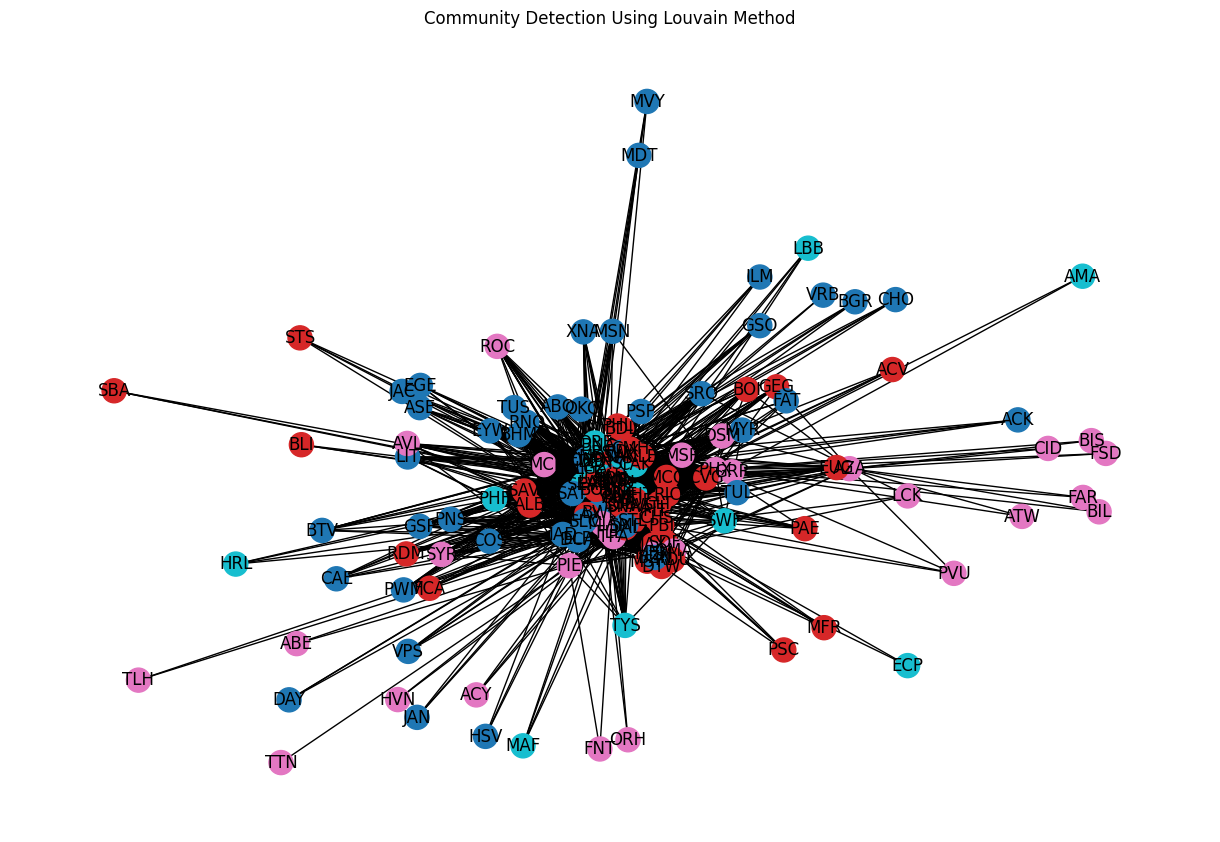

Number of communities detected: 4
Community 0: ['MDW', 'AUS', 'ABQ', 'BWI', 'DCA', 'IAD', 'ORD', 'EWR', 'HPN', 'ISP', 'JFK', 'LGA', 'COS', 'TUS', 'ELP', 'VPS', 'GSP', 'LIT', 'SMF', 'SAT', 'PNS', 'PDX', 'PSP', 'RNO', 'SLC', 'TUL', 'HSV', 'ASE', 'BHM', 'SRQ', 'BZN', 'MYR', 'EYW', 'BTV', 'CAE', 'OKC', 'DAY', 'EGE', 'FAT', 'ILM', 'PWM', 'XNA', 'GSO', 'JAC', 'JAN', 'MSN', 'ACK', 'MVY', 'BGR', 'MDT', 'CHO', 'VRB']
Community 1: ['IND', 'DAL', 'OAK', 'SFO', 'SJC', 'BUR', 'LAX', 'LGB', 'ONT', 'SNA', 'PIT', 'BDL', 'BNA', 'STL', 'JAX', 'DTW', 'MCO', 'RSW', 'SDF', 'MKE', 'MSY', 'PBI', 'PHL', 'RDU', 'RIC', 'SAV', 'ALB', 'ATL', 'CLE', 'BOS', 'PVD', 'CMH', 'GEG', 'BOI', 'BUF', 'CHS', 'CLT', 'CVG', 'EUG', 'SBA', 'MFR', 'STS', 'PAE', 'RDM', 'BLI', 'FCA', 'PSC', 'ACV']
Community 2: ['PHX', 'ABE', 'PIE', 'TPA', 'ACY', 'FLL', 'MIA', 'DSM', 'MSP', 'GRR', 'MCI', 'MEM', 'OMA', 'ATW', 'AZA', 'AVL', 'FSD', 'PVU', 'BIL', 'BIS', 'CID', 'LCK', 'FAR', 'ROC', 'SYR', 'FNT', 'HVN', 'ORH', 'TLH', 'TTN']
Community 3: [

In [ ]:
import community as community_louvain

G_copy = G.copy()

partition = community_louvain.best_partition(G_copy) 

color_map = []
for node in G_copy.nodes():
    color_map.append(partition[node])


plt.figure(figsize=(12, 8))
nx.draw(G_copy, node_color=color_map, with_labels=True, cmap=plt.cm.tab10)
plt.title("Community Detection Using Louvain Method")
plt.show()

print(f"Number of communities detected: {len(set(partition.values()))}")

communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []  
    communities[community_id].append(node)

for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")

In [151]:
connected_components = list(nx.connected_components(G_copy))
print(f"Number of connected components after adding edges: {len(connected_components)}")

# 2. Average shortest path length
try:
    avg_shortest_path = nx.average_shortest_path_length(G_copy, weight='weight')
    print(f"Average shortest path length after adding edges: {avg_shortest_path:.2f}")
except nx.NetworkXError:
    print("Graph is disconnected; average shortest path cannot be calculated.")

# 3. Modularity
modularity_score = modularity(G_copy, [set(nodes) for nodes in communities.values()])
print(f"Modularity after adding edges: {modularity_score:.2f}")

partitions = {}

for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")
    print(f"Size of Community {community_id}: {len(nodes)}")
    subgraph = G_copy.subgraph(nodes)
    partitions[community_id] = subgraph


Number of connected components after adding edges: 1
Average shortest path length after adding edges: 1782.79
Modularity after adding edges: 0.12
Community 0: ['MDW', 'AUS', 'ABQ', 'BWI', 'DCA', 'IAD', 'ORD', 'EWR', 'HPN', 'ISP', 'JFK', 'LGA', 'COS', 'TUS', 'ELP', 'VPS', 'GSP', 'LIT', 'SMF', 'SAT', 'PNS', 'PDX', 'PSP', 'RNO', 'SLC', 'TUL', 'HSV', 'ASE', 'BHM', 'SRQ', 'BZN', 'MYR', 'EYW', 'BTV', 'CAE', 'OKC', 'DAY', 'EGE', 'FAT', 'ILM', 'PWM', 'XNA', 'GSO', 'JAC', 'JAN', 'MSN', 'ACK', 'MVY', 'BGR', 'MDT', 'CHO', 'VRB']
Size of Community 0: 52
Community 1: ['IND', 'DAL', 'OAK', 'SFO', 'SJC', 'BUR', 'LAX', 'LGB', 'ONT', 'SNA', 'PIT', 'BDL', 'BNA', 'STL', 'JAX', 'DTW', 'MCO', 'RSW', 'SDF', 'MKE', 'MSY', 'PBI', 'PHL', 'RDU', 'RIC', 'SAV', 'ALB', 'ATL', 'CLE', 'BOS', 'PVD', 'CMH', 'GEG', 'BOI', 'BUF', 'CHS', 'CLT', 'CVG', 'EUG', 'SBA', 'MFR', 'STS', 'PAE', 'RDM', 'BLI', 'FCA', 'PSC', 'ACV']
Size of Community 1: 48
Community 2: ['PHX', 'ABE', 'PIE', 'TPA', 'ACY', 'FLL', 'MIA', 'DSM', 'MSP', '

Airports with highest betweenness centrality : What community they belong to
PHX with betweenness centrality 0.0887877141206565 : 2
TPA with betweenness centrality 0.05574882292068029 : 2
HPN with betweenness centrality 0.0518138264764645 : 0
LGA with betweenness centrality 0.045560407289004526 : 0
JFK with betweenness centrality 0.04504689119753656 : 0
EWR with betweenness centrality 0.04411722893844175 : 0
FLL with betweenness centrality 0.043859608122826715 : 2
DFW with betweenness centrality 0.04125969425283718 : 3
DAL with betweenness centrality 0.037883501474016215 : 1
SNA with betweenness centrality 0.037311476000963614 : 1


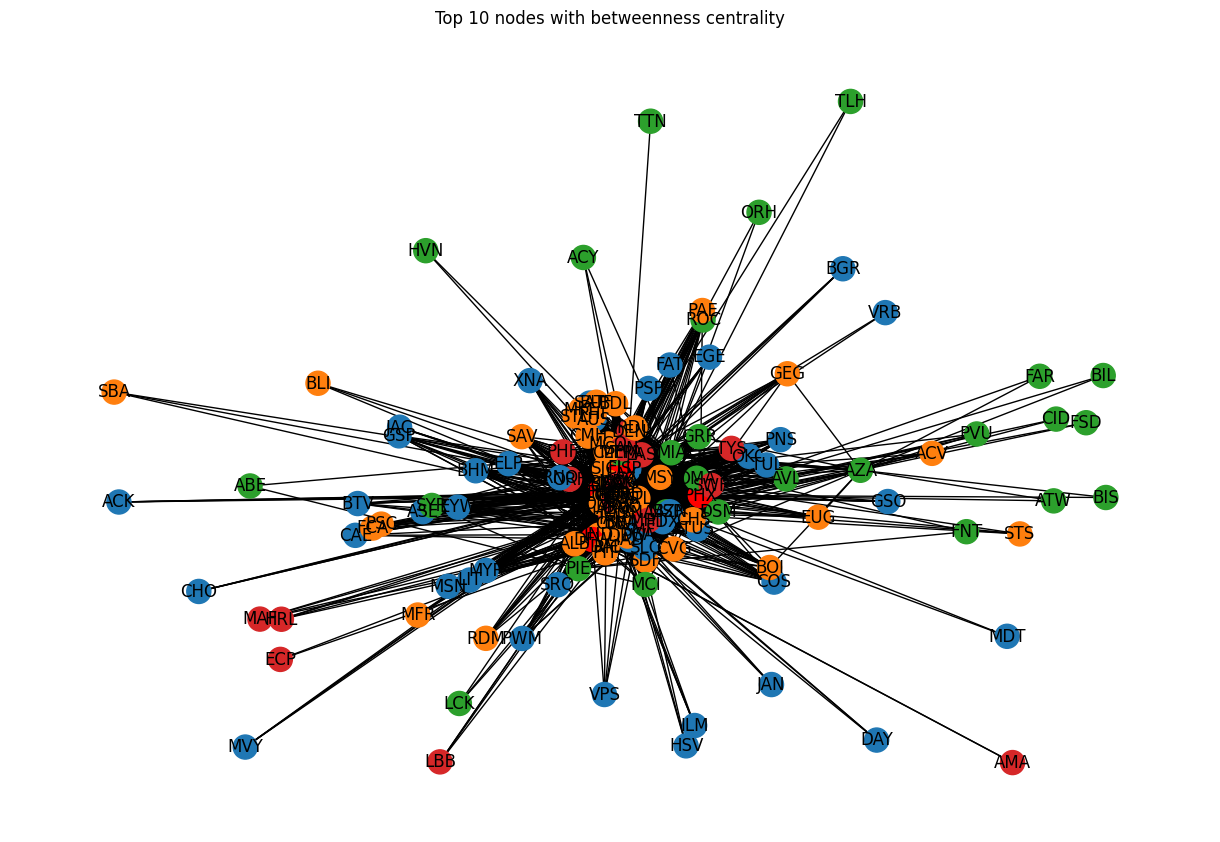

In [145]:
betweenness_cent = nx.betweenness_centrality(G)
b_list = betweenness_cent.items()

top_10_betweenness = sorted(b_list, key=lambda x: x[1], reverse=True)[:10]

print("Airports with highest betweenness centrality : What community they belong to")

for node, centrality in top_10_betweenness:
    community_id = partition[node]
    print(f"{node} with betweenness centrality {centrality} : {community_id}")


top_10_nodes = {node for node, _ in top_10_betweenness}
color_map = []
for node in G_undirected.nodes():
    if node in top_10_nodes:
        color_map.append('red')  
    else:
        community_color = partition[node]  # Get the community ID
        color_map.append(plt.cm.tab10(community_color % 10)) 


plt.figure(figsize=(12, 8))
nx.draw(G_undirected, node_color=color_map, with_labels=True, cmap=plt.cm.tab10)
plt.title("Top 10 nodes with betweenness centrality")
plt.show()


['PHX', 'TPA', 'HPN', 'LGA', 'JFK']
disconnected node added


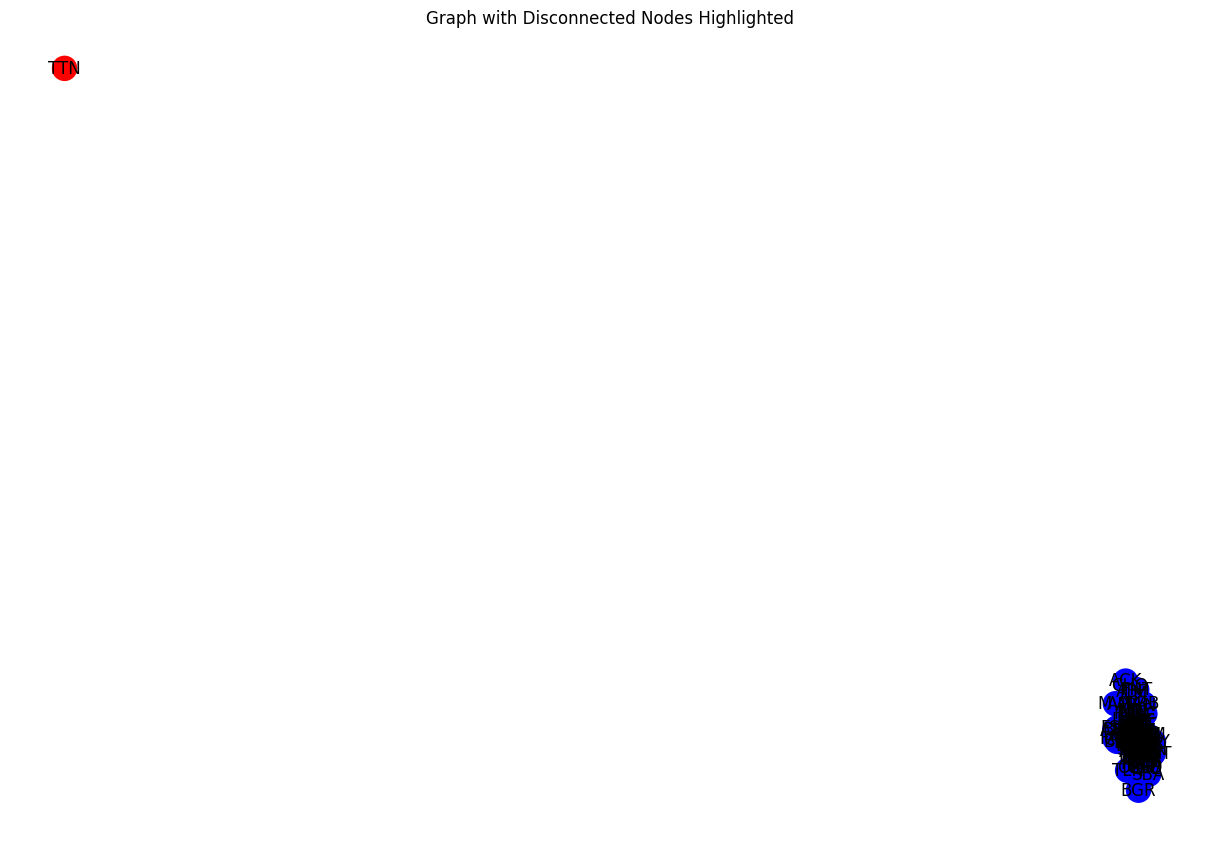

In [146]:
G_removed_1 = G.copy()

nodes_to_remove = []

for node, _ in top_10_betweenness:
    if(len(nodes_to_remove) > 4):
        break
    else:
        nodes_to_remove.append(node)

#G_removed_1.remove_node(top_10_betweenness[5][0])
G_removed_1.remove_nodes_from(nodes_to_remove)
#print(top_10_betweenness[5][0])
print(nodes_to_remove)

disconnected_nodes = []
for comp in list(nx.connected_components(G_removed_1)):
    if len(comp) == 1:  # Single-node components are disconnected
        disconnected_nodes.append(list(comp)[0])
        print("disconnected node added")

color_map = []
for node in G_removed_1.nodes():
    if node in disconnected_nodes:
        color_map.append('red') 
    else:
        color_map.append('blue')  

plt.figure(figsize=(12, 8))
nx.draw(G_removed_1, node_color=color_map, with_labels=True, cmap=plt.cm.tab10)
plt.title("Graph with Disconnected Nodes Highlighted")
plt.show()

['PHX', 'TPA', 'HPN', 'LGA', 'JFK', 'EWR']
disconnected node added
disconnected node added
disconnected node added
disconnected node added
disconnected node added
disconnected node added
disconnected node added
Disconnected nodes: ['ILM', 'JAC', 'TTN', 'ACK', 'MVY', 'BGR', 'CHO']


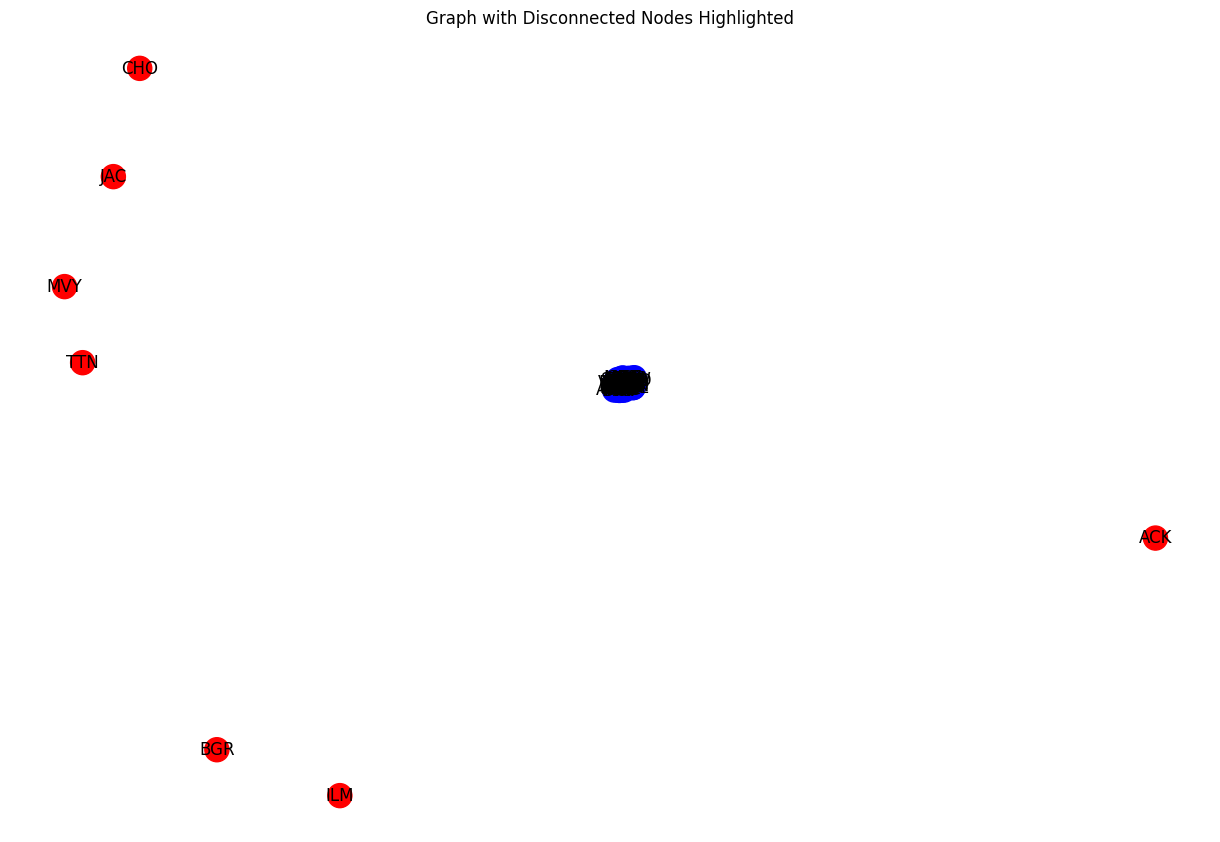

In [147]:
G_removed_2 = G.copy()

nodes_to_remove = []

for node, _ in top_10_betweenness:
    if(len(nodes_to_remove) > 5):
        break
    else:
        nodes_to_remove.append(node)

#G_removed_1.remove_node(top_10_betweenness[5][0])
G_removed_2.remove_nodes_from(nodes_to_remove)
#print(top_10_betweenness[5][0])
print(nodes_to_remove)

disconnected_nodes = []
for comp in list(nx.connected_components(G_removed_2)):
    if len(comp) == 1:  # Single-node components are disconnected
        disconnected_nodes.append(list(comp)[0])
        print("disconnected node added")

print(f"Disconnected nodes: {disconnected_nodes}")

color_map = []
for node in G_removed_2.nodes():
    if node in disconnected_nodes:
        color_map.append('red') 
    else:
        color_map.append('blue')  

plt.figure(figsize=(12, 8))
nx.draw(G_removed_2, node_color=color_map, with_labels=True, cmap=plt.cm.tab10)
plt.title("Graph with Disconnected Nodes Highlighted")
plt.show()

Suggested connections for separated airports:
Connect ILM to EWR
Connect ILM to HPN
Connect ILM to JFK
Connect JAC to EWR
Connect JAC to HPN
Connect JAC to JFK
Connect ACK to EWR
Connect ACK to HPN
Connect ACK to JFK
Connect MVY to EWR
Connect MVY to HPN
Connect MVY to JFK
Connect BGR to EWR
Connect BGR to HPN
Connect BGR to JFK
Connect CHO to EWR
Connect CHO to HPN
Connect CHO to JFK
Connect TTN to TPA
Connect TTN to FLL
Connect TTN to MIA
Average shortest path length after adding edges: 1771.55
Modularity after adding edges: 0.12


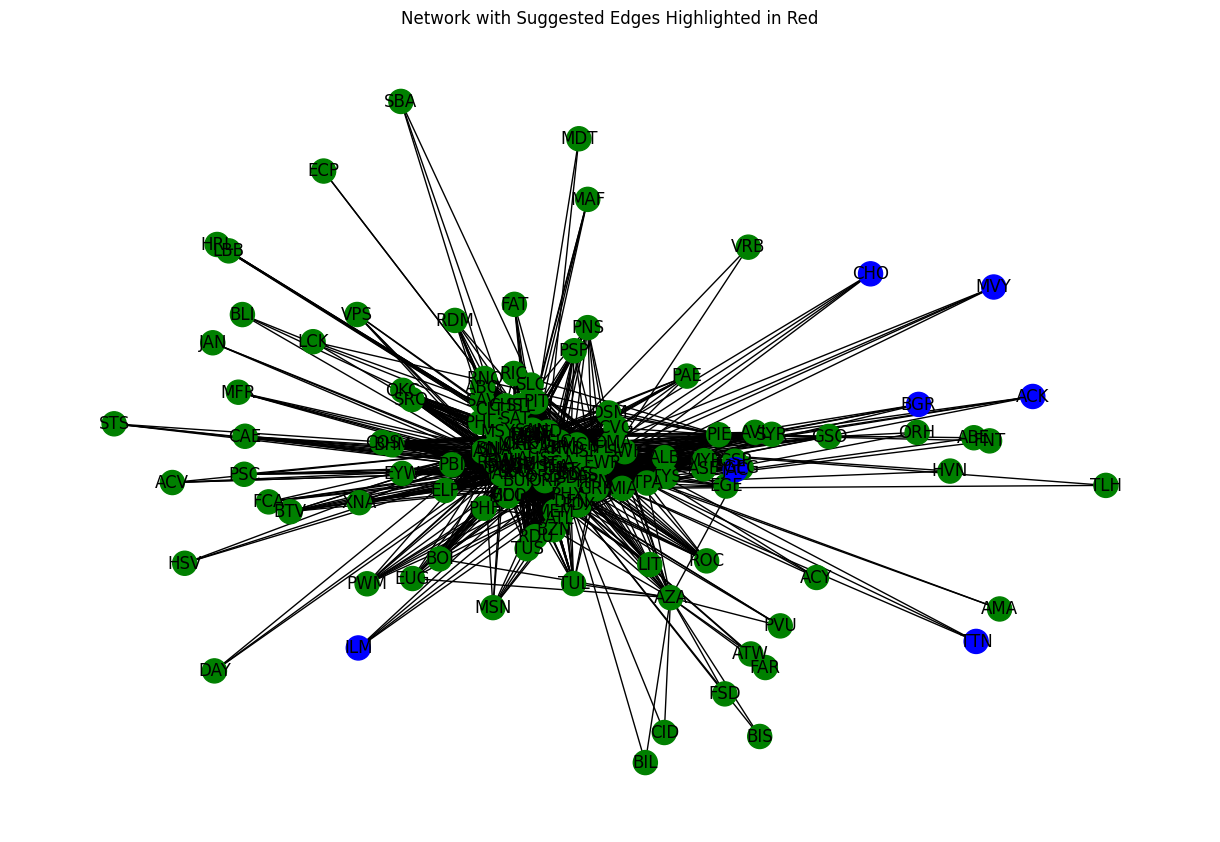

In [169]:
airports_separated = ['ILM', 'JAC', 'ACK', 'MVY', 'BGR', 'CHO', 'TTN']

suggestions = []
for airport in airports_separated:
    # Get the community of the current airport
    community_id = partition[airport]
    community_airports = communities[community_id]

    # Calculate shortest path lengths within the community
    shortest_paths = {
        target: nx.shortest_path_length(G, source=airport, target=target, weight='weight')
        for target in community_airports
        if target != airport and G.has_node(target)
    }

    # Get the 3 nearest airports
    nearest_airports = sorted(shortest_paths.items(), key=lambda x: x[1])[:3]

    # Suggest edges to connect to these airports
    for target, _ in nearest_airports:
        suggestions.append((airport, target))

print("Suggested connections for separated airports:")
for suggestion in suggestions:
    print(f"Connect {suggestion[0]} to {suggestion[1]}")

# Step 3: Add suggested edges to the graph and evaluate
G_new = G.copy()
G_new.add_edges_from(suggestions)



avg_shortest_path = nx.average_shortest_path_length(G_new, weight='weight')
print(f"Average shortest path length after adding edges: {avg_shortest_path:.2f}")


# 3. Modularity
modularity_score = modularity(G_new, [set(nodes) for nodes in communities.values()])
print(f"Modularity after adding edges: {modularity_score:.2f}")

# Step 4: Visualize the graph with suggested edges
edge_colors = ['red' if edge in suggestions else 'black' for edge in G_new.edges()]
node_colors = ['blue' if node in airports_separated else 'green' for node in G_new.nodes()]

plt.figure(figsize=(12, 8))
nx.draw(
    G_new,
    node_color=node_colors,
    edge_color=edge_colors,
    with_labels=True,
    cmap=plt.cm.tab10
)
plt.title("Network with Suggested Edges Highlighted in Red")
plt.show()

In [165]:
degree_centrality = nx.degree_centrality(G)
medium_nodes = {}

for community_id, nodes in communities.items():
    for community_id, nodes in communities.items():
        sorted_nodes = sorted(nodes, key=lambda x: degree_centrality[x])
        n = len(sorted_nodes)
        ind_20 = int(0.20 * n)
        ind_80 = int(0.80 * n)
        medium_nodes[community_id] = sorted_nodes[ind_20 : ind_80]

print("Medium-connected nodes in each community:")
for community_id, nodes in medium_nodes.items():
    print(f"Community {community_id}: {nodes}")


Medium-connected nodes in each community:
Community 0: ['CHO', 'VPS', 'FAT', 'EGE', 'GSO', 'CAE', 'ASE', 'MSN', 'BTV', 'PWM', 'XNA', 'GSP', 'LIT', 'PSP', 'EYW', 'PNS', 'COS', 'MYR', 'SRQ', 'TUL', 'OKC', 'BHM', 'TUS', 'ELP', 'RNO', 'BZN', 'SMF', 'ABQ', 'AUS', 'SAT', 'SLC']
Community 1: ['GEG', 'EUG', 'ALB', 'BOI', 'BDL', 'PBI', 'PHL', 'SAV', 'SDF', 'MKE', 'RIC', 'DTW', 'RSW', 'RDU', 'BUF', 'CHS', 'IND', 'PIT', 'JAX', 'MSY', 'STL', 'CVG', 'BNA', 'CLT', 'MCO', 'ATL', 'CMH', 'CLE', 'PVD']
Community 2: ['CID', 'FAR', 'FNT', 'HVN', 'ORH', 'TLH', 'ACY', 'LCK', 'PVU', 'AVL', 'SYR', 'ROC', 'PIE', 'AZA', 'DSM', 'GRR', 'MEM', 'OMA']
Community 3: ['LBB', 'MAF', 'SWF', 'TYS', 'PHF', 'SAN', 'ORF', 'SEA', 'DEN', 'LAS', 'CAK']


In [167]:
# Step 3: Suggest connections
suggestions = []
for airport in airports_separated:
    airport_community = partition[airport]

    # Find medium-connected nodes in other communities
    for community_id, nodes in medium_nodes.items():
        if community_id != airport_community:
            # Connect to the first available medium node in a different community
            for target in nodes:
                if not G.has_edge(airport, target) and not G.has_edge(target, airport):
                    suggestions.append((airport, target))
                    break
            break  

print("Suggested connections for optimization:")
for suggestion in suggestions:
    print(f"Connect {suggestion[0]} to {suggestion[1]}")


G_new = G.copy()
G_new.add_edges_from(suggestions)

avg_shortest_path = nx.average_shortest_path_length(G_new, weight='weight')
print(f"Average shortest path length after adding edges: {avg_shortest_path:.2f}")

diameter = nx.diameter(G_new, weight='weight')
print(f"Diameter of the network after adding edges: {diameter}")



Suggested connections for optimization:
Connect ILM to GEG
Connect JAC to GEG
Connect ACK to GEG
Connect MVY to GEG
Connect BGR to GEG
Connect CHO to GEG
Connect TTN to CHO
Average shortest path length after adding edges: 1558.34
Diameter of the network after adding edges: 4667


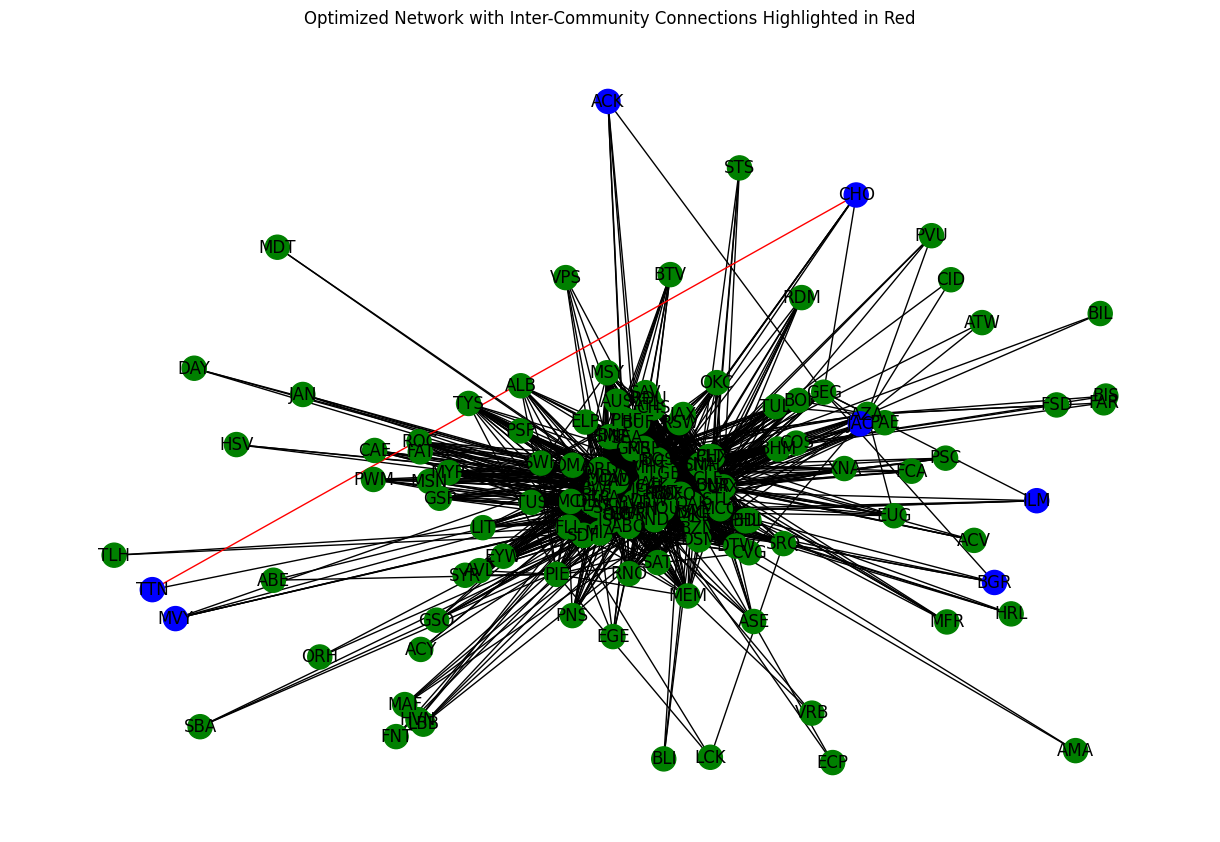

In [168]:

# Visualize the graph with added edges
edge_colors = ['red' if edge in suggestions else 'black' for edge in G_new.edges()]
node_colors = ['blue' if node in airports_separated else 'green' for node in G_new.nodes()]

plt.figure(figsize=(12, 8))
nx.draw(
    G_new,
    node_color=node_colors,
    edge_color=edge_colors,
    with_labels=True,
    cmap=plt.cm.tab10
)
plt.title("Optimized Network with Inter-Community Connections Highlighted in Red")
plt.show()